In [1]:
import requests
import networkx as nx
import matplotlib.pyplot as plt
from typing import Dict

In [2]:
API_URL = "http://localhost:8000"

def get_versions():
    response = requests.get(f"{API_URL}/versions")
    return response.json()

def get_schema_timestamps(version):
    response = requests.get(f"{API_URL}/archive/schema/{version}")
    return response.json()

def get_schema_data(version, timestamp):
    response = requests.get(f"{API_URL}/archive/schema/{version}/{timestamp}")
    return response.json()

In [3]:
get_versions()

{'versions': ['v1', 'default', 'v2', 'v3']}

In [4]:
get_schema_timestamps("v3")

[115,
 142,
 154,
 103,
 197,
 178,
 20,
 206,
 98,
 77,
 210,
 139,
 61,
 181,
 36,
 119,
 41,
 230,
 16,
 158,
 57,
 226,
 174,
 94,
 123,
 82,
 6,
 135,
 162,
 163,
 7,
 83,
 134,
 95,
 122,
 175,
 227,
 56,
 159,
 17,
 231,
 118,
 40,
 180,
 37,
 138,
 60,
 211,
 99,
 76,
 207,
 196,
 179,
 21,
 102,
 155,
 143,
 114,
 47,
 236,
 148,
 10,
 109,
 51,
 220,
 172,
 92,
 125,
 84,
 0,
 133,
 164,
 113,
 144,
 152,
 105,
 191,
 26,
 200,
 129,
 71,
 216,
 88,
 67,
 187,
 168,
 30,
 186,
 169,
 31,
 240,
 89,
 66,
 217,
 128,
 70,
 201,
 190,
 27,
 104,
 153,
 145,
 112,
 165,
 1,
 85,
 132,
 93,
 124,
 173,
 221,
 108,
 50,
 149,
 11,
 237,
 46,
 166,
 189,
 218,
 69,
 131,
 2,
 86,
 127,
 90,
 28,
 170,
 222,
 53,
 12,
 234,
 45,
 32,
 185,
 65,
 214,
 73,
 202,
 24,
 193,
 107,
 150,
 146,
 49,
 111,
 238,
 239,
 48,
 110,
 147,
 151,
 106,
 25,
 192,
 203,
 72,
 215,
 64,
 33,
 184,
 44,
 235,
 13,
 52,
 223,
 29,
 171,
 126,
 91,
 68,
 130,
 87,
 3,
 219,
 167,
 188,
 34,
 183,
 63

In [5]:
get_schema_data("v3", 240)


{'directed': True,
 'multigraph': False,
 'graph': {},
 'node_types': {'Supplier': ['node_type',
   'name',
   'location',
   'reliability',
   'size',
   'id'],
  'Warehouse': ['node_type',
   'name',
   'type',
   'size',
   'location',
   'max_capacity',
   'current_capacity',
   'safety_stock',
   'id'],
  'Parts': ['node_type',
   'name',
   'description',
   'type',
   'cost',
   'importance',
   'expected_life',
   'id'],
  'Facility': ['node_type',
   'name',
   'type',
   'location',
   'max_capacity',
   'operating_cost',
   'id'],
  'ProductOffering': ['node_type', 'name', 'cost', 'demand', 'id'],
  'ProductFamily': ['node_type', 'name', 'revenue', 'id'],
  'BusinessUnit': ['node_type', 'name', 'description', 'revenue', 'id']},
 'relationship_types': {'SupplierToWarehouse': ['relationship_type',
   'transportation_cost',
   'lead_time',
   'source',
   'target'],
  'WarehouseToParts': ['relationship_type',
   'inventory_level',
   'storage_cost',
   'source',
   'target'],
 

In [6]:
def decompress_schema(compressed_data):
    decompressed = {
        "directed": compressed_data["directed"],
        "multigraph": compressed_data["multigraph"],
        "graph": compressed_data["graph"],
        "nodes": [],
        "links": []
    }
    
    # Decompress nodes
    for node_type, keys in compressed_data["node_types"].items():
        for values in compressed_data["node_values"][node_type]:
            node = dict(zip(keys, values))
            decompressed["nodes"].append(node)
    
    # Decompress links
    for values in compressed_data["link_values"]:
        rel_type = values[0]  # Assuming relationship_type is always first
        keys = compressed_data["relationship_types"][rel_type]
        link = dict(zip(keys, values))
        decompressed["links"].append(link)
    
    return decompressed
decompress_schema(get_schema_data("v3", 240))

{'directed': True,
 'multigraph': False,
 'graph': {},
 'nodes': [{'node_type': 'Supplier',
   'name': 'qaMrKRyO',
   'location': 'EsgOfJKD',
   'reliability': 353.27,
   'size': 'DtZVhMxt',
   'id': '1'},
  {'node_type': 'Warehouse',
   'name': 'lzApACqo',
   'type': 'FOnCvRjj',
   'size': 'gzsEPcFP',
   'location': 'dtOQtDXB',
   'max_capacity': 43,
   'current_capacity': 27,
   'safety_stock': 81,
   'id': '1-1'},
  {'node_type': 'Parts',
   'name': 'ctCqaGZr',
   'description': 'RliiGuTu',
   'type': 'IhhDXood',
   'cost': 502.37,
   'importance': 37,
   'expected_life': 41,
   'id': '1-1-1'},
  {'node_type': 'Facility',
   'name': 'AjuUjLsX',
   'type': 'cdwtPWQH',
   'location': 'DwHLwGaW',
   'max_capacity': 82,
   'operating_cost': 643.36,
   'id': '1-1-1-1'},
  {'node_type': 'Facility',
   'name': 'SvhCFRNw',
   'type': 'mYApisMI',
   'location': 'XWEYIywL',
   'max_capacity': 91,
   'operating_cost': 760.12,
   'id': '1-1-1-2'},
  {'node_type': 'ProductOffering',
   'name': '

/Users/dev/LAM/graph-server/venv/lib/python3.12/site-packages/networkx/readwrite/json_graph/node_link.py:287: FutureWarning: 
The default value will be changed to `edges="edges" in NetworkX 3.6.

To make this warning go away, explicitly set the edges kwarg, e.g.:

  nx.node_link_graph(data, edges="links") to preserve current behavior, or
  nx.node_link_graph(data, edges="edges") for forward compatibility.
  warnings.warn(


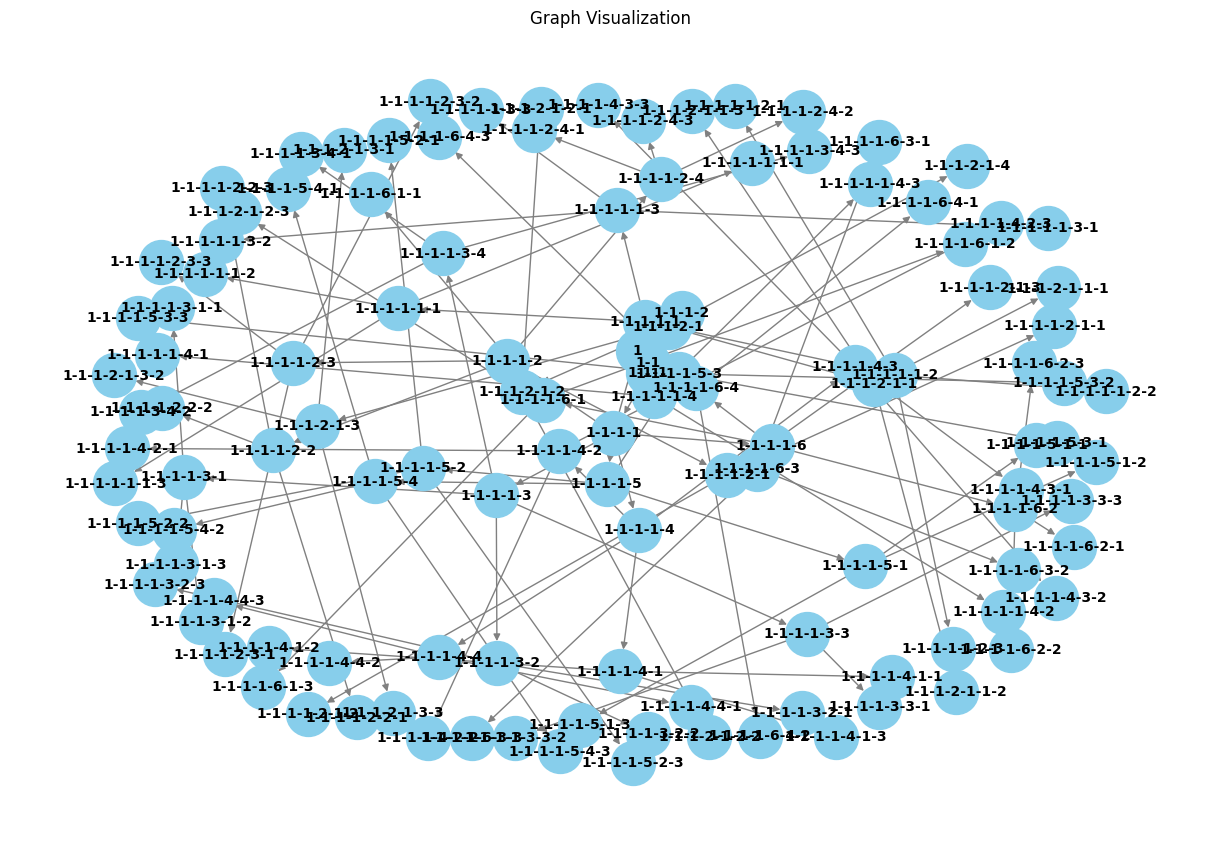

In [7]:
from networkx.readwrite import json_graph
G = json_graph.node_link_graph(decompress_schema(get_schema_data("v3", 240)))

plt.figure(figsize=(12, 8))
nx.draw(G, with_labels=True, node_size=1000, node_color="skyblue", font_size=10, font_weight="bold", edge_color="gray")
plt.title("Graph Visualization")
plt.show()  
